# Kollokasjoner for nøkkelord

In [13]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [14]:
css()

In [15]:
mu.code_toggle()

In [16]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [17]:
import pandas as pd

In [18]:
import ast

In [19]:
#colls_before = pd.read_json('demokrati_before.json')

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [22]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [23]:
keyword = 'kreft'

In [24]:
keyword_graph = nb.make_graph(keyword, cutoff=16)

In [25]:
comm = gnl.community_dict(keyword_graph)

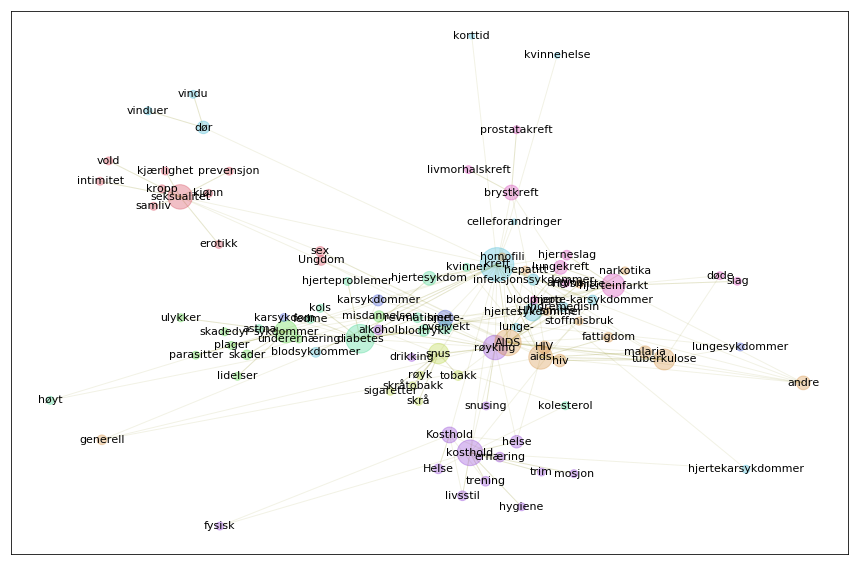

In [26]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [27]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [111]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(i)))

<span style='font-size:1.1em'>kreft, hjerte-karsykdommer, tuberkulose, hjertekarsykdommer, helse, alkohol, aids, hjerte-, hepatitt, kosthold, AIDS, høyt, tobakk, overvekt, revmatisme, lungekreft, hjerteinfarkt, snus, hjertesykdom, karsykdom, hjertesykdommer, blodtrykk, andre, hiv, HIV, røyking, malaria, karsykdommer, diabetes</span>

<span style='font-size:1.1em'>kreft, misdannelser, skader, sykdommer</span>

<span style='font-size:1.1em'>kreft, tuberkulose, aids, andre, AIDS</span>

<span style='font-size:1.1em'>kreft, hjerteinfarkt, blodtrykk, røyking, overvekt, diabetes</span>

<span style='font-size:1.1em'>kreft, karsykdommer, hjerte-, diabetes</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [29]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### snus-tobakk
<span style='font-size:1.1em'>snus, tobakk, sigaretter, skrå, røyk, skråtobakk</span>
### sykdommer-misdannelser
<span style='font-size:1.1em'>sykdommer, misdannelser, skader, ulykker, lidelser, skadedyr, underernæring, plager, parasitter</span>
### diabetes-hjertesykdom
<span style='font-size:1.1em'>diabetes, hjertesykdom, overvekt, blodtrykk, revmatisme, kols, kvinner, kolesterol, hjerteproblemer, fedme, høyt, astma</span>
### kreft-hjertesykdommer
<span style='font-size:1.1em'>kreft, hjertesykdommer, dør, infeksjonssykdommer, hjerte-karsykdommer, indremedisin, blodsykdommer, lunge-, hjertekarsykdommer, vinduer, vindu, celleforandringer, korttid, kvinnehelse</span>
### hjerte--karsykdommer
<span style='font-size:1.1em'>hjerte-, karsykdommer, lungesykdommer, karsykdom</span>
### kosthold-røyking
<span style='font-size:1.1em'>kosthold, røyking, Kosthold, helse, ernæring, alkohol, Helse, livsstil, trening, fysisk, drikking, mosjon, trim, snusing, hygiene</span>
### hjerteinfarkt-brystkreft
<span style='font-size:1.1em'>hjerteinfarkt, brystkreft, lungekreft, hjerneslag, slag, angina, prostatakreft, blodpropp, livmorhalskreft, døde</span>
### seksualitet-Ungdom
<span style='font-size:1.1em'>seksualitet, Ungdom, sex, kropp, kjønn, kjærlighet, samliv, intimitet, erotikk, prevensjon, vold</span>
### AIDS-aids
<span style='font-size:1.1em'>AIDS, aids, tuberkulose, andre, malaria, HIV, hiv, fattigdom, generell, HlVsmitte, HIV-smitte, stoffmisbruk, hepatitt, narkotika, homofili</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [30]:
reference = pd.read_json('avis_agg.json')

In [31]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

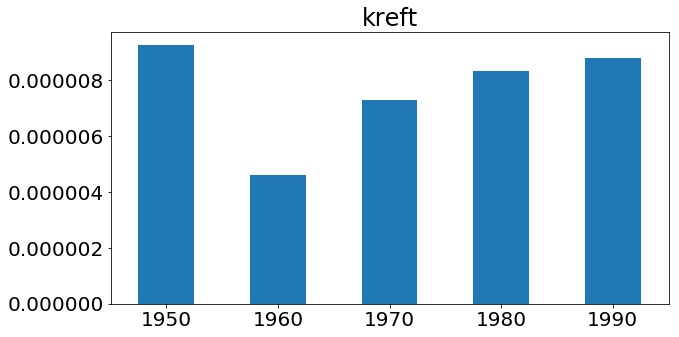

In [32]:
barchart(keyword, reference);

In [72]:
collocations = dict()
step = 1
for i in range(1950, 2000):
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)

In [73]:
colls = nb.frame(collocations)

In [74]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [75]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [76]:
agg = group_frames(colls)

In [77]:
nb.normalize_corpus_dataframe(agg)

True


# Opptelling

In [78]:
reference.sort_values(by=reference.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0678003,0.0636145,0.0626906,0.0639755,0.0677927
",",0.0422489,0.0412801,0.0360161,0.0375341,0.0360303
i,0.0245355,0.0246246,0.0241509,0.0223459,0.020813
og,0.0207927,0.021255,0.0188187,0.0187015,0.0167394
er,0.0112082,0.0110687,0.0112091,0.0109266,0.0102024
til,0.0116211,0.0112357,0.0110929,0.010449,0.00925942
det,0.011029,0.0104679,0.00987488,0.0087761,0.00727579
som,0.0100824,0.0100878,0.00975404,0.00902762,0.00786269
for,0.00917307,0.00942805,0.00930159,0.00870384,0.00758499
av,0.00976008,0.00965961,0.00918297,0.00824812,0.00709569


In [79]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0561363,0.0506863,0.0525478,0.0577527,0.0574584
",",0.0398046,0.0411356,0.035416,0.0344626,0.0353841
i,0.0279728,0.0306716,0.0285958,0.0250676,0.02538
av,0.0228266,0.0263088,0.0233631,0.0205407,0.0213931
og,0.0198908,0.0246291,0.0231205,0.026723,0.0258311
er,0.0157659,0.0157369,0.0182057,0.0173179,0.0162155
som,0.0156064,0.0159118,0.0165094,0.0165402,0.0158618
for,0.0135012,0.0130261,0.0155024,0.0159807,0.0149608
at,0.0118368,0.0121013,0.012978,0.0117821,0.0115504
til,0.0131147,0.0133137,0.0128927,0.0113778,0.0109523


In [80]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]**1.02/(pd.concat([agg[i], reference[i]],axis=1).sum(axis=1))

In [81]:
nb.normalize_corpus_dataframe(pmi)

True

# Sammenligner med en referanse


<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [82]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
Landsforeningen,4.36021e-05,4.6358e-05,4.58354e-05,3.2615e-05,2.03898e-05
kreft,4.30402e-05,4.59777e-05,4.53335e-05,3.26641e-05,2.19703e-05
sykdommer,4.28669e-05,4.5714e-05,4.4684e-05,3.19953e-05,2.1625e-05
tuberkulose,4.26275e-05,4.45099e-05,4.28091e-05,3.04122e-05,2.03985e-05
dødsfall,4.22915e-05,4.44429e-05,4.35517e-05,3.02664e-05,2.02265e-05
hjertesykdommer,4.20497e-05,4.47238e-05,4.32002e-05,3.10828e-05,2.11003e-05
sirkulasjonsorganene,4.20455e-05,4.49154e-05,4.31511e-05,2.87196e-05,0
fremkalle,4.1886e-05,4.47158e-05,4.44552e-05,3.1279e-05,2.05844e-05
lungebetennelse,4.18824e-05,4.49435e-05,4.11458e-05,2.95911e-05,2.00892e-05
kampen,4.18698e-05,4.30222e-05,4.07238e-05,2.77813e-05,1.76255e-05


In [83]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
Landsforeningen,4.36021e-05,4.6358e-05,4.58354e-05,3.2615e-05,2.03898e-05
kreft,4.30402e-05,4.59777e-05,4.53335e-05,3.26641e-05,2.19703e-05
sykdommer,4.28669e-05,4.5714e-05,4.4684e-05,3.19953e-05,2.1625e-05
tuberkulose,4.26275e-05,4.45099e-05,4.28091e-05,3.04122e-05,2.03985e-05
dødsfall,4.22915e-05,4.44429e-05,4.35517e-05,3.02664e-05,2.02265e-05
hjertesykdommer,4.20497e-05,4.47238e-05,4.32002e-05,3.10828e-05,2.11003e-05
sirkulasjonsorganene,4.20455e-05,4.49154e-05,4.31511e-05,2.87196e-05,0
fremkalle,4.1886e-05,4.47158e-05,4.44552e-05,3.1279e-05,2.05844e-05
lungebetennelse,4.18824e-05,4.49435e-05,4.11458e-05,2.95911e-05,2.00892e-05
kampen,4.18698e-05,4.30222e-05,4.07238e-05,2.77813e-05,1.76255e-05


In [84]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
Landsforeningen,4.36021e-05,4.6358e-05,4.58354e-05,3.2615e-05,2.03898e-05
livmorhalsen,4.15019e-05,4.59939e-05,4.43566e-05,3.15339e-05,2.11634e-05
kreft,4.30402e-05,4.59777e-05,4.53335e-05,3.26641e-05,2.19703e-05
sykdommer,4.28669e-05,4.5714e-05,4.4684e-05,3.19953e-05,2.1625e-05
hjerneblødning,4.18365e-05,4.5163e-05,4.25056e-05,2.58319e-05,1.94581e-05
virus,4.13639e-05,4.51214e-05,4.40217e-05,3.01121e-05,1.97153e-05
lungebetennelse,4.18824e-05,4.49435e-05,4.11458e-05,2.95911e-05,2.00892e-05
sirkulasjonsorganene,4.20455e-05,4.49154e-05,4.31511e-05,2.87196e-05,0
forstadiet,3.97501e-05,4.47364e-05,4.14886e-05,2.98864e-05,2.01977e-05
hjertesykdommer,4.20497e-05,4.47238e-05,4.32002e-05,3.10828e-05,2.11003e-05


In [85]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
Landsforeningen,4.36021e-05,4.6358e-05,4.58354e-05,3.2615e-05,2.03898e-05
kreft,4.30402e-05,4.59777e-05,4.53335e-05,3.26641e-05,2.19703e-05
sykdommer,4.28669e-05,4.5714e-05,4.4684e-05,3.19953e-05,2.1625e-05
fremkalle,4.1886e-05,4.47158e-05,4.44552e-05,3.1279e-05,2.05844e-05
livmorhalsen,4.15019e-05,4.59939e-05,4.43566e-05,3.15339e-05,2.11634e-05
Kreft,4.17617e-05,4.45081e-05,4.41553e-05,3.16412e-05,2.10175e-05
virus,4.13639e-05,4.51214e-05,4.40217e-05,3.01121e-05,1.97153e-05
framkalle,4.09409e-05,4.39166e-05,4.3734e-05,3.07537e-05,2.0463e-05
lider,4.1203e-05,4.44768e-05,4.36183e-05,3.06704e-05,2.05741e-05
brystkreft,4.12828e-05,4.34693e-05,4.36103e-05,3.12417e-05,2.11165e-05


In [86]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
kreft,4.30402e-05,4.59777e-05,4.53335e-05,3.26641e-05,2.19703e-05
Landsforeningen,4.36021e-05,4.6358e-05,4.58354e-05,3.2615e-05,2.03898e-05
sykdommer,4.28669e-05,4.5714e-05,4.4684e-05,3.19953e-05,2.1625e-05
Kreft,4.17617e-05,4.45081e-05,4.41553e-05,3.16412e-05,2.10175e-05
risikoen,3.87834e-05,4.21226e-05,4.35558e-05,3.15574e-05,2.12971e-05
livmorhalsen,4.15019e-05,4.59939e-05,4.43566e-05,3.15339e-05,2.11634e-05
karsykdommer,3.96177e-05,4.39307e-05,4.3421e-05,3.15269e-05,2.12257e-05
Krafttak,0,4.02492e-05,0,3.15083e-05,2.18651e-05
Mat,0,1.27659e-05,1.07491e-05,3.14613e-05,2.06998e-05
diagnosen,4.02461e-05,4.28402e-05,4.33584e-05,3.14516e-05,2.15012e-05


In [87]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
kreft,4.30402e-05,4.59777e-05,4.53335e-05,3.26641e-05,2.19703e-05
Krafttak,0,4.02492e-05,0,3.15083e-05,2.18651e-05
døde,3.8641e-05,4.37589e-05,4.27857e-05,3.13835e-05,2.16443e-05
sykdommer,4.28669e-05,4.5714e-05,4.4684e-05,3.19953e-05,2.1625e-05
diagnosen,4.02461e-05,4.28402e-05,4.33584e-05,3.14516e-05,2.15012e-05
rammet,3.23162e-05,3.76532e-05,4.10538e-05,3.12015e-05,2.13346e-05
risiko,3.37553e-05,4.1596e-05,4.35526e-05,3.10423e-05,2.13303e-05
risikoen,3.87834e-05,4.21226e-05,4.35558e-05,3.15574e-05,2.12971e-05
karsykdommer,3.96177e-05,4.39307e-05,4.3421e-05,3.15269e-05,2.12257e-05
krafttak,2.2601e-05,2.52305e-05,3.64867e-05,3.01342e-05,2.11704e-05


<br>
<br>

# Assosiasjoner og variasjon over år.

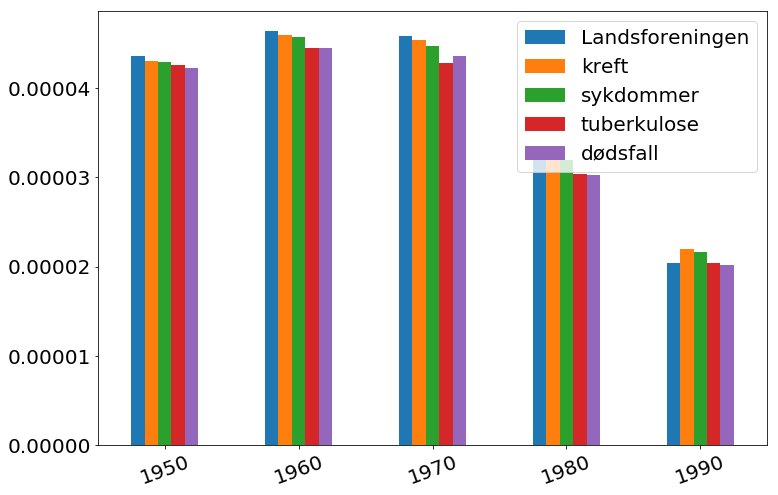

In [88]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [89]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

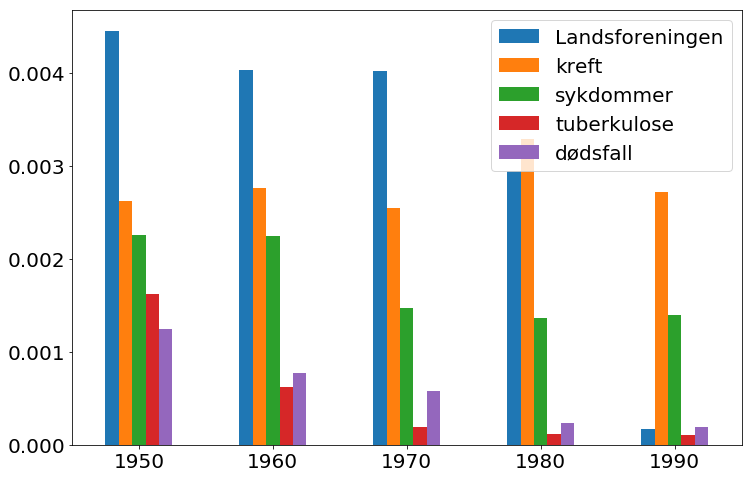

In [90]:
freq_assoc_val(agg, pmi, 0)

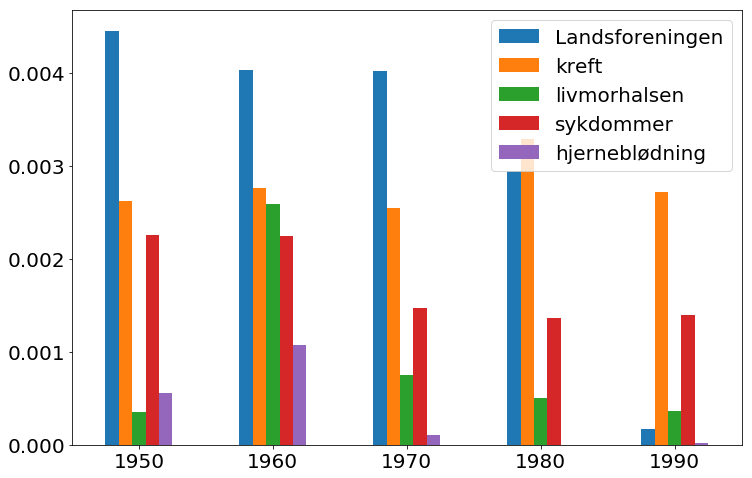

In [91]:
freq_assoc_val(agg, pmi, 1)

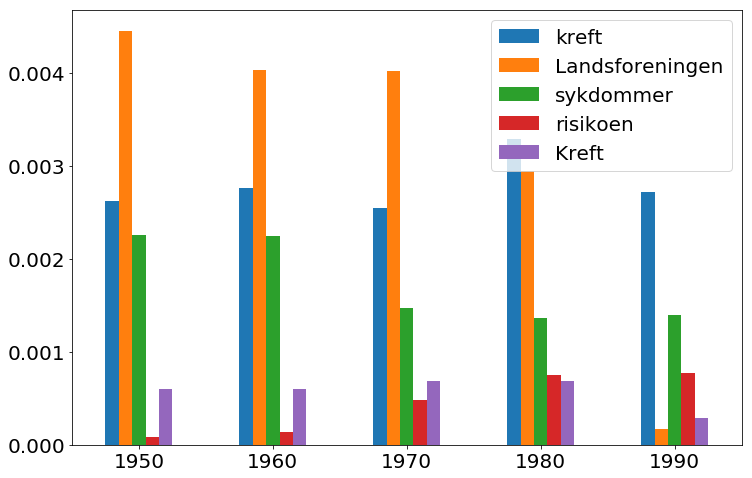

In [92]:
freq_assoc_val(agg, pmi, 3)

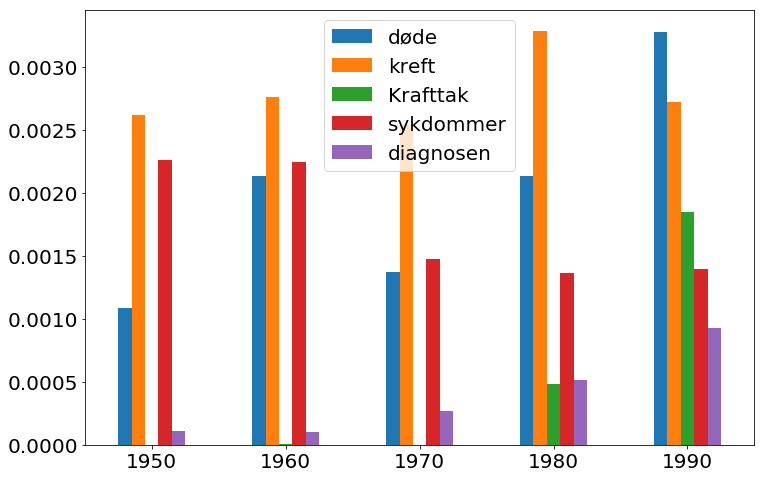

In [93]:
freq_assoc_val(agg, pmi, 4)

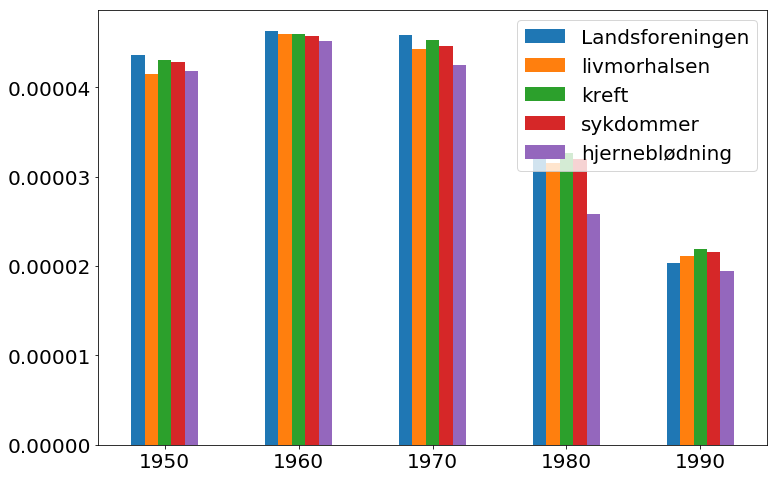

In [94]:
freq_assoc_val(pmi, pmi, 1)

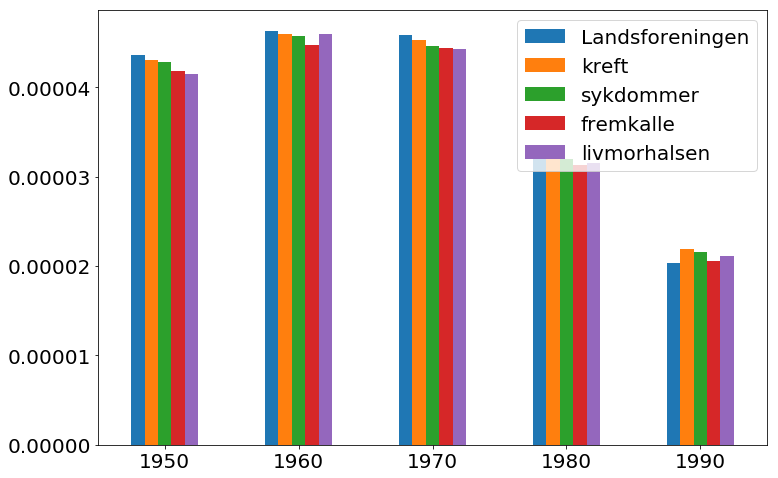

In [95]:
freq_assoc_val(pmi, pmi, 2)

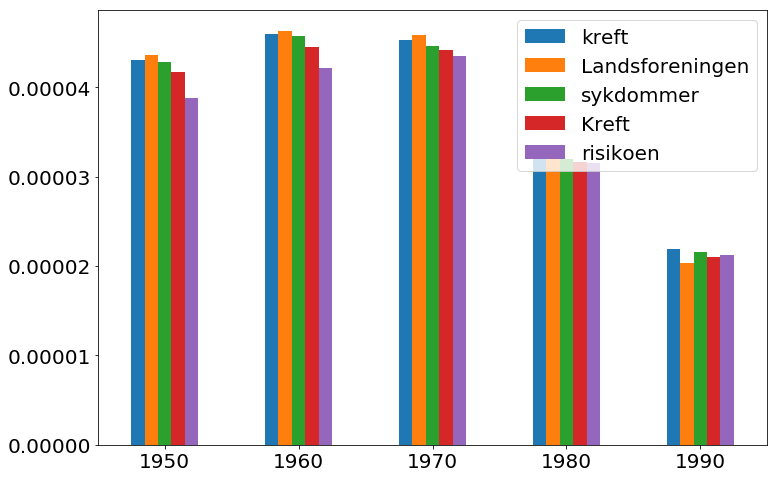

In [96]:
freq_assoc_val(pmi, pmi, 3)

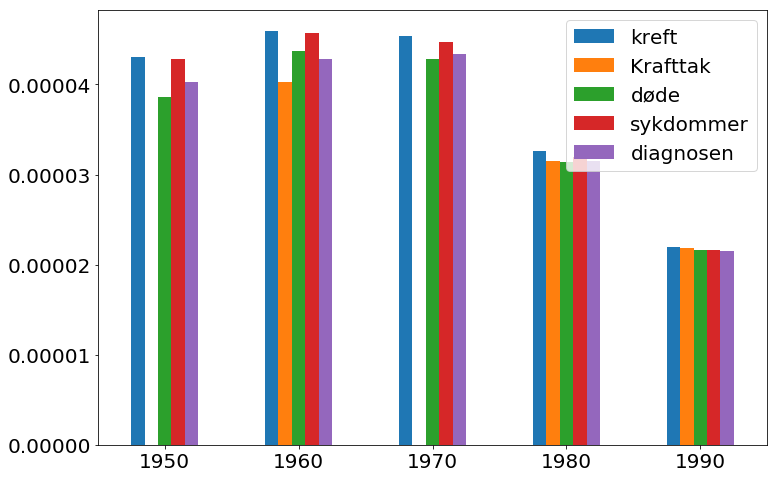

In [97]:
freq_assoc_val(pmi, pmi, 4)

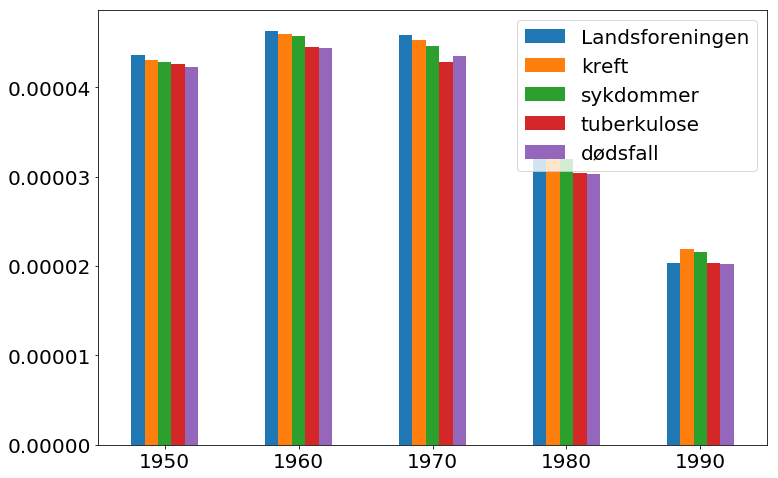

In [98]:
freq_assoc_val(pmi, pmi, 0)

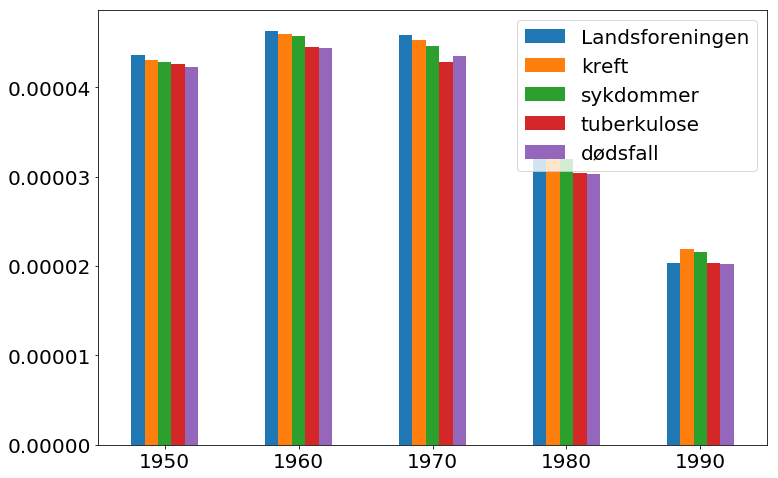

In [99]:
freq_assoc_val(pmi, pmi, 0)

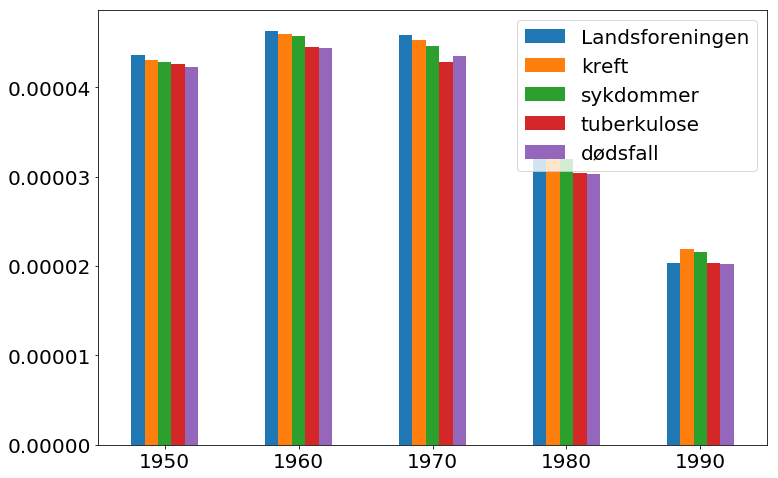

In [100]:
freq_assoc_val(pmi, pmi, 0)

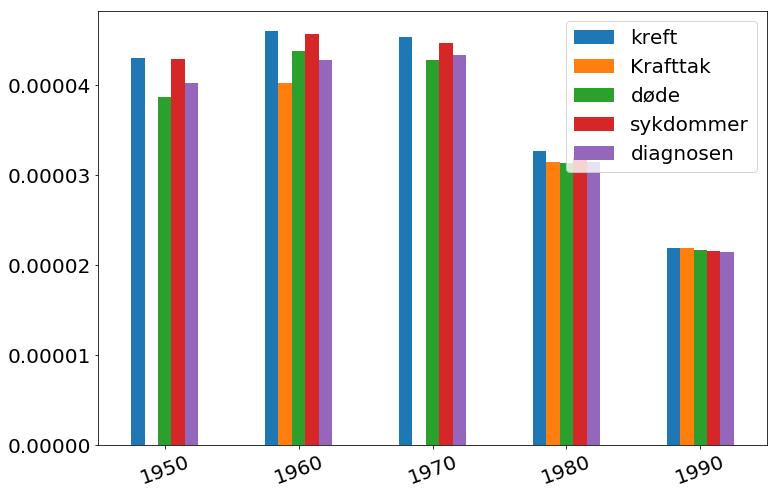

In [101]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

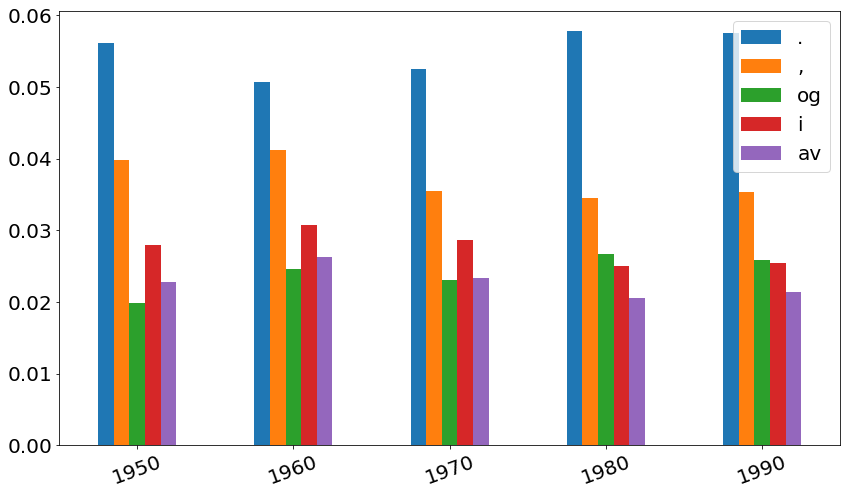

In [102]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden 1965-1980 sortert på ordklasser

In [103]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Landsforeningen, Kreft, Falconbridge, Bidrag, Kreftsjukdommane, Radiumhospitalet, KREFT, Kreftregisteret, Nikkelverk, Behandlingen, Risikoen</span>

## subst
<span style='font-size:1.1em'>kreft, sykdommer, livmorhalsen, virus, brystkreft, gave, sykdommen, lungekreft, risikoen, risiko, dødsfall, diagnose, karsykdommer, stråling, leukemi, diagnosen, hjerteinfarkt, lunger, magesekken, tykktarmen, røyking, hjertesykdommer, hyppigheten, tilfeller, strålebehandling, sykdom, pasienter, sukkersyke, helbredelse, dødsårsak, leveren, strupehodet, livmor, prostata, tykktarm, urinblære, hyppighet, luftveiene, strupen, svulster, asbest, bukspyttkjertelen, tuberkulose, forsøksdyr, behandling, endetarmen, sammenhengen, mavesekken</span>
## verb
<span style='font-size:1.1em'>fremkalle, framkalle, lider, påvist, helbredet, strupe, stoffer, helbredes, fremkaller, innbetales, forårsake, helbrede, former, operert, oppdages, rammes, forebygge, døde, årsak</span>
## adj
<span style='font-size:1.1em'>uhelbredelig, hyppigste, genetiske, kjemiske, fremskreden</span>
## unknown
<span style='font-size:1.1em'>yrkesbetinget, kreftformer, slektnings, overhyppighet, kreftforskningen, hjerte-, sirkulasjonsorganene, overhyppigheten, kreftforskning, langtkommen, landsforeningen, minnegåve, oppdagar, fordøyelsesorganene, kreftpasienter, storrøykere, fosterskader</span>


# Hvordan utvikler ordene seg?

In [104]:
barchart = lambda w, title='': pmi.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

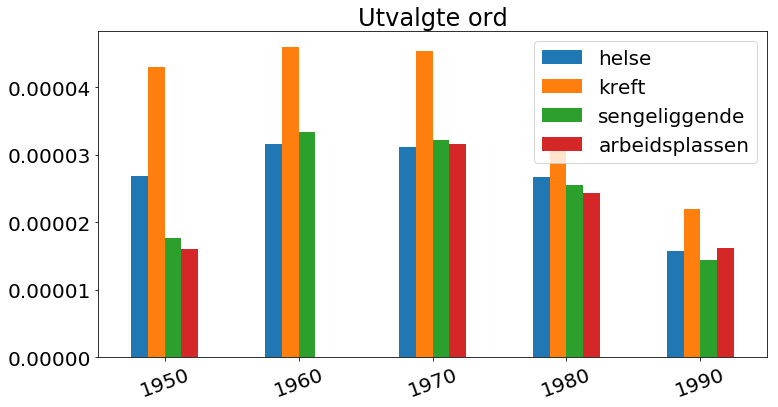

In [105]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

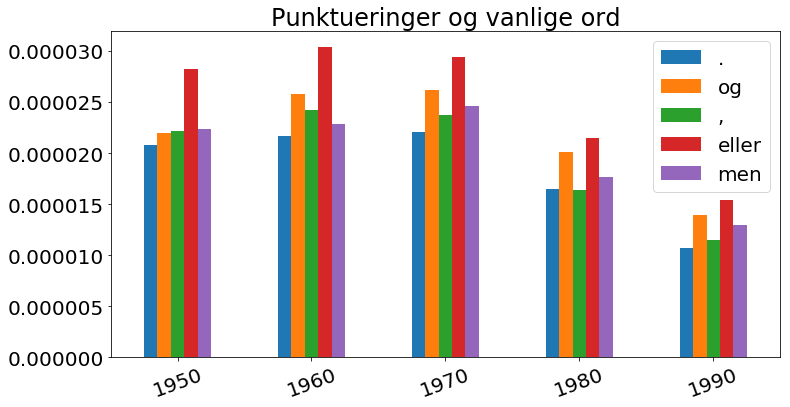

In [106]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord');

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [107]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

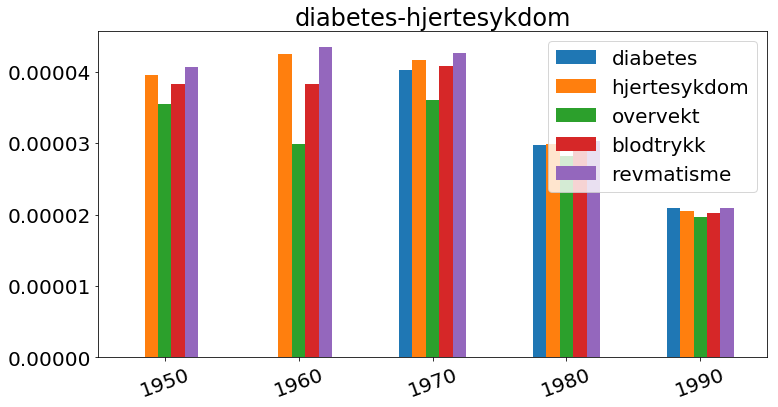

In [108]:
commchart(2, (0,5));

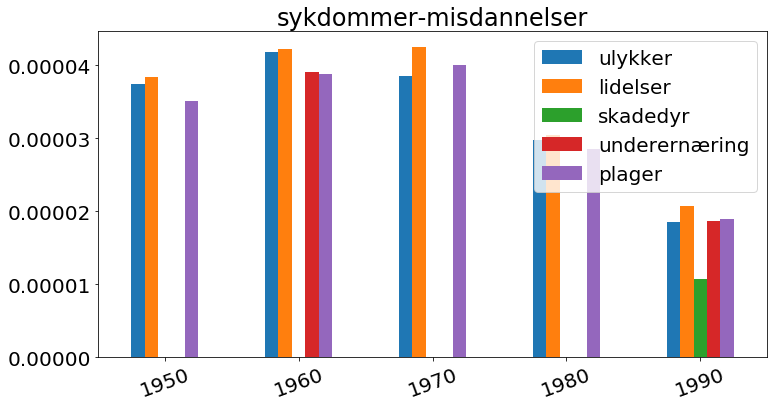

In [109]:
commchart(1, (3, 8))

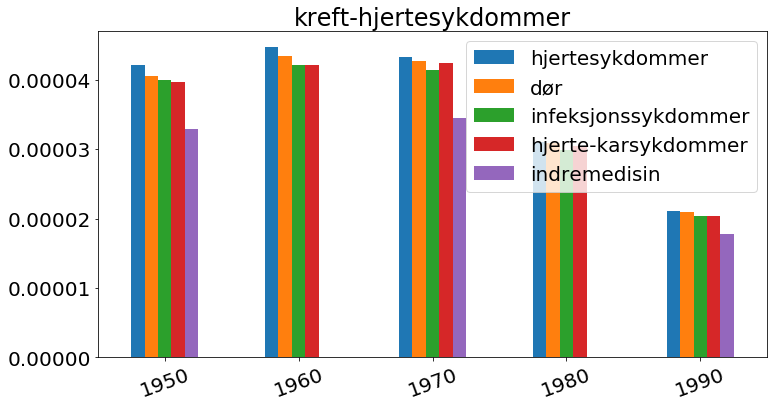

In [110]:
commchart(3)